### Question 1

In [5]:


import pandas as pd
import numpy as np
import matplotlib,pylab as plt
import seaborn as sns

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', delimiter='|')
print(users.head())


   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [6]:

mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)




occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [7]:

# Filtering only males
males = users[users['gender'] == 'M']

# Count males per occupation
male_counts = males.groupby('occupation').size()

# Count total per occupation
total_counts = users.groupby('occupation').size()

# Calculate male ratio
male_ratio = (male_counts / total_counts) * 100

# Sorting
sorted_male_ratio = male_ratio.sort_values(ascending=False)

print(sorted_male_ratio)


occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64


In [8]:
min_max_ages = users.groupby('occupation')['age'].agg(['min', 'max'])
print(min_max_ages)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [9]:
mean_age_by_occ_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_occ_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [10]:
gender_counts = users.groupby(['occupation', 'gender']).size().unstack()

# Calculate percentage
gender_counts['Male_percentage'] = (gender_counts['M'] / (gender_counts['M'] + gender_counts['F'])) * 100
gender_counts['Female_percentage'] = (gender_counts['F'] / (gender_counts['M'] + gender_counts['F'])) * 100

gender_percentages = gender_counts[['Male_percentage', 'Female_percentage']]
print(gender_percentages)


gender         Male_percentage  Female_percentage
occupation                                       
administrator        54.430380          45.569620
artist               53.571429          46.428571
doctor                     NaN                NaN
educator             72.631579          27.368421
engineer             97.014925           2.985075
entertainment        88.888889          11.111111
executive            90.625000           9.375000
healthcare           31.250000          68.750000
homemaker            14.285714          85.714286
lawyer               83.333333          16.666667
librarian            43.137255          56.862745
marketing            61.538462          38.461538
none                 55.555556          44.444444
other                65.714286          34.285714
programmer           90.909091           9.090909
retired              92.857143           7.142857
salesman             75.000000          25.000000
scientist            90.322581           9.677419


### Question 2

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"

euro12 = pd.read_csv(url)
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [2]:
num_teams = euro12.shape[0]
print(f"{num_teams} teams participated in the Euro2012.")


16 teams participated in the Euro2012.


In [3]:
num_columns = euro12.shape[1]
print(f"The dataset has {num_columns} columns.")


The dataset has 35 columns.


In [4]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [5]:
sorted_teams = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print(sorted_teams)


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [6]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print(f"The mean number of Yellow Cards given per team is {mean_yellow_cards:.2f}.")


The mean number of Yellow Cards given per team is 7.44.


In [7]:
teams_above_6_goals = euro12[euro12['Goals'] > 6]
print(teams_above_6_goals)


       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [8]:
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
print(teams_starting_with_g)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [9]:
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [10]:
exclude_last_3_columns = euro12.iloc[:, :-3]
print(exclude_last_3_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [11]:
selected_teams = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])]
shooting_accuracy = selected_teams[['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


### Question 3

In [57]:


# Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2. Create 3 different Series, each of length 100, as follows:
first = pd.Series(np.random.randint(1, 5, 100))       # random number from 1 to 4
second = pd.Series(np.random.randint(1, 4, 100))      # random number from 1 to 3
third = pd.Series(np.random.randint(10000, 30001, 100))  # random number from 10,000 to 30,000

# Step 3. Create a DataFrame by joining the Series by column
df = pd.concat([first, second, third], axis=1)

# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([first, second, third], axis=0).to_frame(name='bigcolumn')

# Step 6. Ops it seems it is going only until index 99. Is it true?
print(bigcolumn.index.max())  # This will print the maximum index. If it's 99, then yes.

# Step 7. Reindex the DataFrame so it goes from 0 to 299



99


In [ ]:
bigcolumn = bigcolumn.reset_index(drop=True)

print(bigcolumn)

In [30]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:\Data Programming\wind.txt')
print(data.head())

  Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
0  61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 1...                              
1  61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 1...                              
2  61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 1...                              
3  61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  ...                              
4  61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 1...                              


In [50]:
data = pd.read_csv(r'C:\\Data Programming\\wind.txt', delim_whitespace=True)
print(data.head())


   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [52]:
# Print the column names
print(data.columns)

# Based on this output, let's try to adjust the creation of the "Date" column accordingly.


Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL'],
      dtype='object')


### Question 4

### Question 5

In [58]:


# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

# Step 3. Assign it to a variable called chipo.
chipo = pd.read_csv(url, sep='\t')

# Step 4. See the first 10 entries
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [59]:
# Step 5. What is the number of observations in the dataset?
print(len(chipo))


4622


In [60]:
# Step 6. What is the number of columns in the dataset?
print(chipo.shape[1])


5


In [61]:
# Step 7. Print the name of all the columns.
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [62]:
# Step 8. How is the dataset indexed?
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [63]:
# Step 9. Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)
print(most_ordered_item.index[0])

Chicken Bowl


C:\Users\tonyd\AppData\Local\Temp\ipykernel_16812\3416142072.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_item = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)


In [64]:
# Step 10. For the most-ordered item, how many items were ordered?
print(most_ordered_item['quantity'].values[0])


761


In [65]:
# Step 11. What was the most ordered item in the choice_description column?
most_ordered_choice = chipo[chipo['choice_description'].notna()]
most_ordered_choice = most_ordered_choice.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)
print(most_ordered_choice.index[0])

[Diet Coke]


C:\Users\tonyd\AppData\Local\Temp\ipykernel_16812\664137097.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_ordered_choice = most_ordered_choice.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)


In [66]:
# Step 12. How many items were ordered in total?
print(chipo['quantity'].sum())

4972


In [71]:
# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

39237.02


In [72]:
# Step 15. How many orders were made in the period?
total_orders = chipo['order_id'].nunique()
print(total_orders)

1834


In [73]:
# Step 16. What is the average revenue amount per order?
average_revenue = revenue / total_orders
print(average_revenue)

21.39423118865867


In [74]:
# Step 17. How many different items are sold?
unique_items_count = chipo['item_name'].nunique()
print(unique_items_count)

50


### Question 6

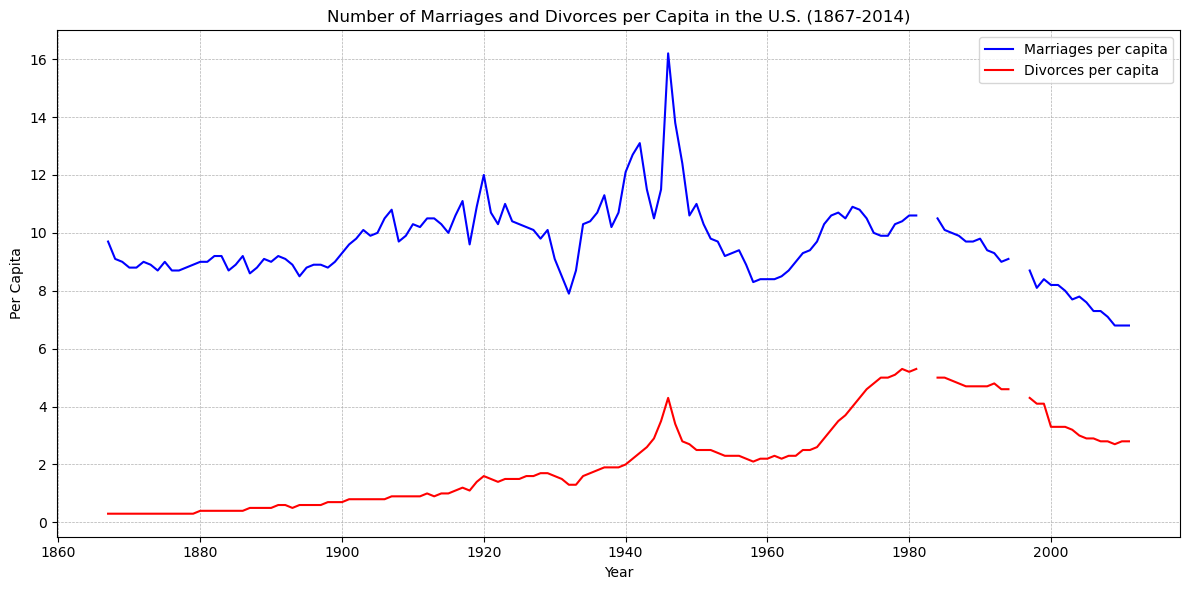

In [75]:

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a Pandas DataFrame
data = pd.read_csv(r'C:\Data Programming\us-marriages-divorces-1867-2014.csv')

# Step 2: Plot the data
plt.figure(figsize=(12, 6))  # Set the size of the figure

# Plotting Marriages per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per capita', color='blue')

# Plotting Divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per capita', color='red')

# Step 3: Labeling
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.legend()  # To show the legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid for better readability
plt.tight_layout()

plt.show()


### Question 7

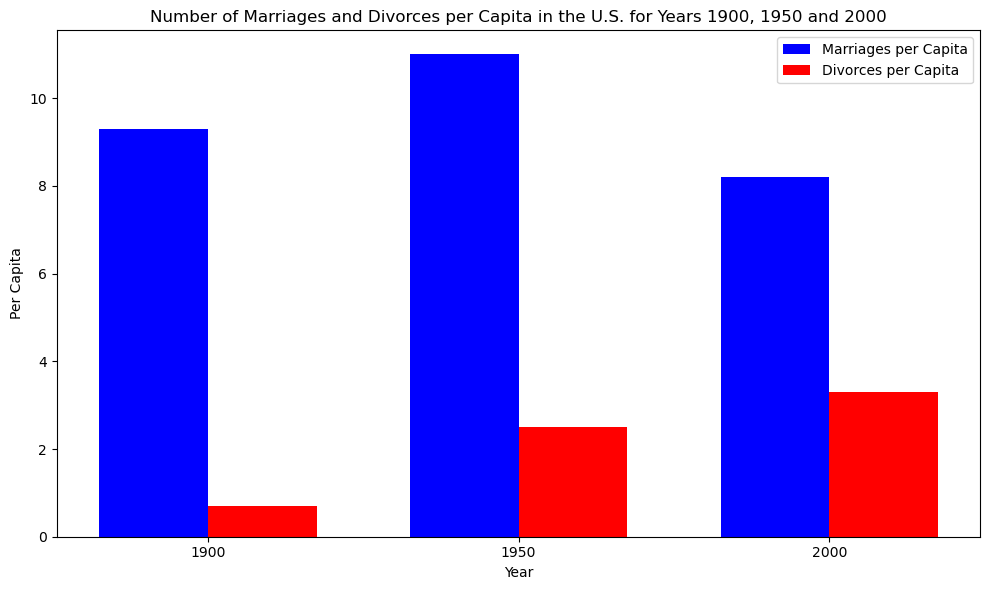

In [3]:


import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(r'C:\Data Programming\us-marriages-divorces-1867-2014.csv')

# Filter the data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]

# Setting the bar width
bar_width = 0.35
index = list(range(len(filtered_data)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, filtered_data['Marriages_per_1000'], bar_width, color='blue', label='Marriages per Capita')

# Using list comprehension to add bar_width to each element in index
bar2 = plt.bar([i + bar_width for i in index], filtered_data['Divorces_per_1000'], bar_width, color='red', label='Divorces per Capita')

# Labeling the chart
plt.title('Number of Marriages and Divorces per Capita in the U.S. for Years 1900, 1950 and 2000')
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.xticks([i + bar_width / 2 for i in index], filtered_data['Year'])  # Positioning the year labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()



### Question 8

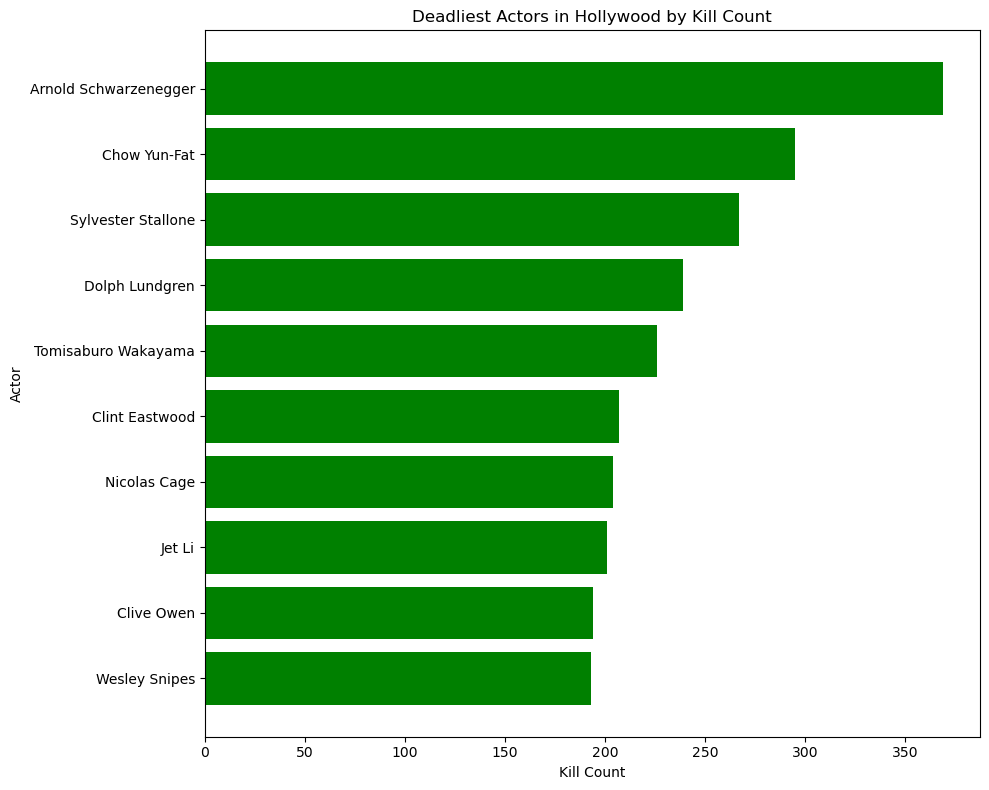

In [6]:


import pandas as pd
import matplotlib.pyplot as plt

# Reading the CSV file into a Pandas DataFrame
data = pd.read_csv(r'C:\Data Programming\actor_kill_counts.csv')

# Sorting the data by the kill count
sorted_data = data.sort_values(by='Count', ascending=True)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='green')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood by Kill Count')
plt.tight_layout()

# Displaying the plot
plt.show()



### Question 9

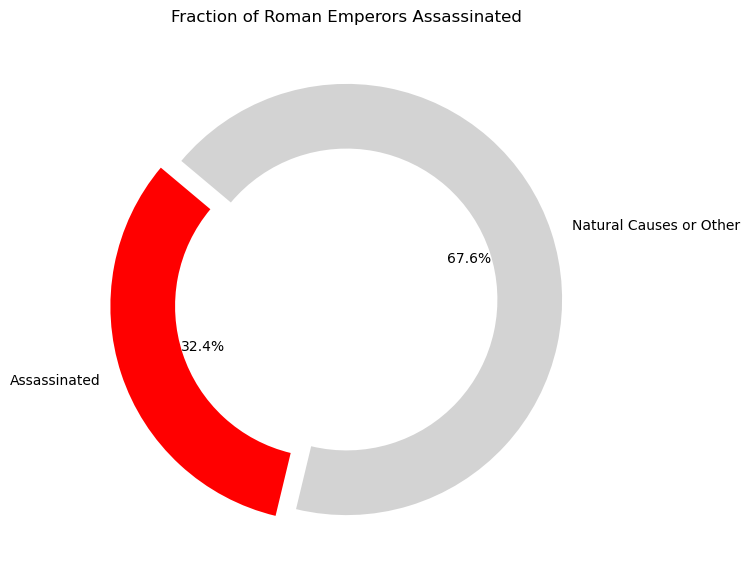

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the CSV file into a Pandas DataFrame
data = pd.read_csv(r'C:\Data Programming\roman-emperor-reigns.csv')

# 2. Group the data by cause of death and count occurrences
death_counts = data['Cause_of_Death'].value_counts()

# Check if "Assassinated" is a category; if not, add it with a count of 0
if 'Assassinated' not in death_counts.index:
    death_counts['Assassinated'] = 0

# 3. Plot the pie chart
plt.figure(figsize=(10, 7))
labels = ['Assassinated', 'Natural Causes or Other']
sizes = [death_counts['Assassinated'], sum(death_counts) - death_counts['Assassinated']]
colors = ['red', 'lightgray']
explode = (0.1, 0)  # explode the 1st slice (Assassinated)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Fraction of Roman Emperors Assassinated')
plt.gca().set_aspect('equal')  # Ensure pie is drawn as a circle

# 4. Display the pie chart
plt.show()


### Question 10

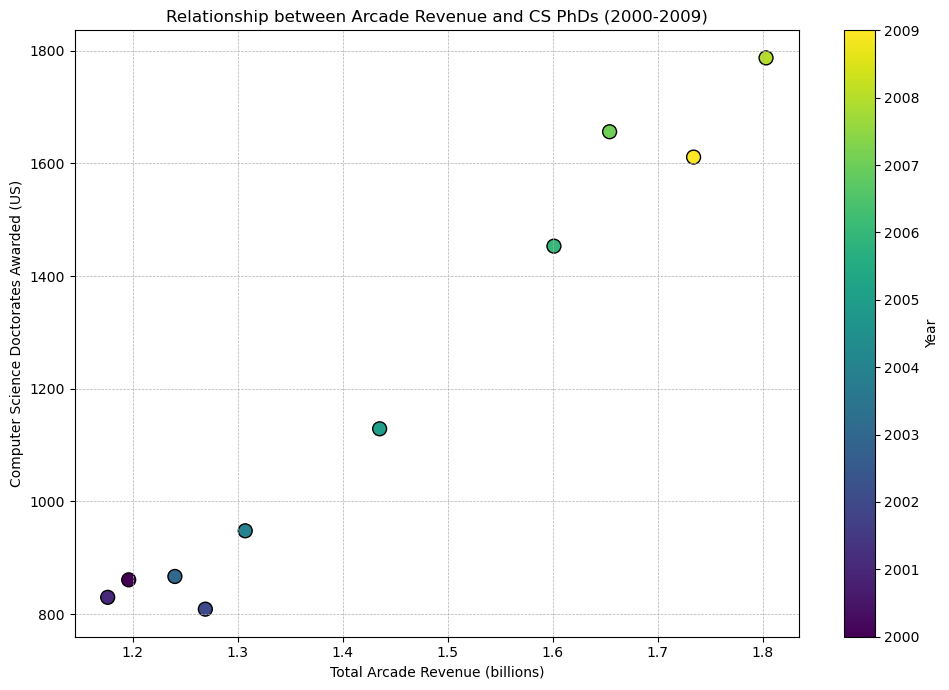

In [8]:


import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Read the CSV file into a Pandas DataFrame
data = pd.read_csv(r'C:\Data Programming\arcade-revenue-vs-cs-doctorates.csv')

# Step 3: Plot the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], 
                      c=data['Year'], cmap='viridis', s=100, edgecolor='k')

# Labeling the axes and the plot
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Displaying the plot
plt.tight_layout()
plt.show()

